In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from eval import make_compare_plot,plot_cdf,plot_pdf,make_prediction_diff,make_prediction,DCR, hitting_rate, make_clustering,convert_type
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import numpy
from tqdm import tqdm
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import os
import glob
%matplotlib inline

In [2]:
dataname = "adult"
datapath = "../dataset"
generated = "{}/generated/{}/".format(datapath,dataname)
print(os.listdir(generated))
data_origin = pd.read_csv("{}/origin/{}.csv".format(datapath,dataname))

# 没用5%data

#data_sample = pd.read_csv("dataset/train/adult_train_sample.csv")

['VAE', 'sel', 'KL', 'sel_mean', 'sel_mean_w', 'mean', 'ctgan', 'only_sel']


In [3]:
for name in os.listdir(generated):
    list_of_files = glob.glob('{}/{}/*.csv'.format(generated,name)) # * means all if need specific format then *.csv
    latest_file = max(list_of_files, key=os.path.getctime)
    globals()[name] = pd.read_csv(latest_file)

In [4]:
list_of_files = glob.glob('{}/{}/*.csv'.format(generated,"ctgan")) # * means all if need specific format then *.csv
latest_file = min(list_of_files, key=os.path.getctime)
globals()[name] = pd.read_csv(latest_file)
ctgan = ctgan.iloc[: , 1:]
ctgan

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,State-gov,194446,Masters,14,Married-civ-spouse,Other-service,Husband,White,Male,11,0,37,Mexico,<=50K
1,43,Self-emp-not-inc,92559,7th-8th,3,Widowed,Other-service,Not-in-family,White,Male,-17,0,40,Cuba,<=50K
2,38,Self-emp-not-inc,227045,Masters,14,Separated,Prof-specialty,Not-in-family,White,Male,14,0,40,Canada,<=50K
3,33,Self-emp-not-inc,118209,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,1,0,40,United-States,<=50K
4,50,Self-emp-not-inc,66063,7th-8th,5,Never-married,Machine-op-inspct,Not-in-family,White,Male,19,1,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,17,Private,289283,HS-grad,9,Never-married,Other-service,Own-child,Black,Female,0,-1,40,United-States,<=50K
30144,48,Private,284688,9th,5,Widowed,Machine-op-inspct,Not-in-family,White,Male,-24,1,34,United-States,<=50K
30145,30,Private,102455,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,-2,0,57,United-States,>50K
30146,50,Private,120383,Masters,14,Married-civ-spouse,Sales,Wife,White,Female,12,0,50,Guatemala,<=50K


In [5]:
VAE = VAE.set_axis(data_origin.columns, axis=1, inplace=False)
VAE

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,51.511290,Private,189712.30,HS-grad,10.118682,Married-civ-spouse,Craft-repair,Husband,White,Male,1115.2910,88.518450,40.950466,United-States,<=50K
1,38.545963,Private,189713.47,Bachelors,12.669794,Never-married,Prof-specialty,Not-in-family,White,Male,1115.3430,88.523636,40.950367,United-States,<=50K
2,38.542667,Private,190299.92,Bachelors,12.669868,Married-civ-spouse,Prof-specialty,Husband,White,Male,1115.4373,89.548110,41.029034,United-States,>50K
3,38.542423,Private,189714.20,HS-grad,10.121409,Never-married,Other-service,Not-in-family,White,Male,1115.2734,88.518440,40.950085,United-States,<=50K
4,51.699604,Private,189712.17,HS-grad,10.118683,Married-civ-spouse,Craft-repair,Husband,White,Male,1115.3370,88.518480,41.135376,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30143,51.699608,Private,189712.23,HS-grad,10.118758,Married-civ-spouse,Other-service,Not-in-family,White,Female,1115.2789,88.518440,40.950080,United-States,<=50K
30144,49.206932,Private,189713.23,Bachelors,12.669877,Married-civ-spouse,Exec-managerial,Husband,White,Male,2907.2373,88.518600,52.919910,United-States,>50K
30145,40.429287,Private,189712.88,HS-grad,10.118708,Married-civ-spouse,Craft-repair,Husband,White,Male,1115.3157,88.526240,40.950333,United-States,<=50K
30146,51.668465,Private,189711.97,HS-grad,10.118697,Married-civ-spouse,Exec-managerial,Husband,White,Male,1137.7845,88.519325,40.950480,United-States,>50K


## Visualization

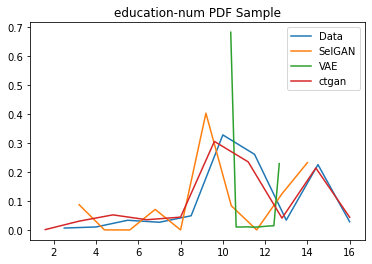

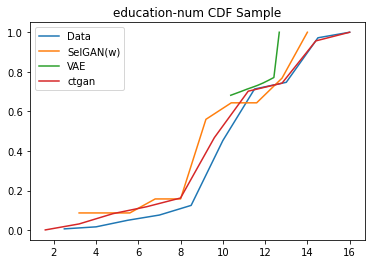

In [6]:
make_compare_plot([data_origin,sel_mean_w,VAE,ctgan],"education-num",
plot_pdf,["Data","SelGAN","VAE","ctgan"],"education-num PDF Sample")
make_compare_plot([data_origin,sel_mean_w,VAE,ctgan],"education-num",
plot_cdf,["Data","SelGAN(w)","VAE","ctgan"],"education-num CDF Sample")

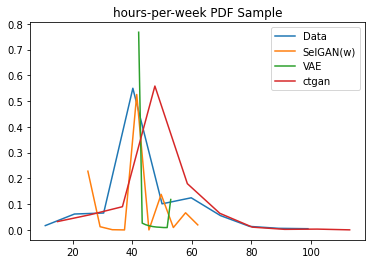

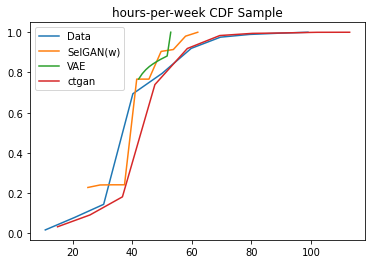

In [7]:
make_compare_plot([data_origin,sel_mean_w,VAE,ctgan],"hours-per-week",
plot_pdf,["Data","SelGAN(w)","VAE","ctgan"],"hours-per-week PDF Sample")
make_compare_plot([data_origin,sel_mean_w,VAE,ctgan],"hours-per-week",
plot_cdf,["Data","SelGAN(w)","VAE","ctgan"],"hours-per-week CDF Sample")

## Evaluation

#### Convert data type

In [8]:
data_origin["label"] = "data"


sel_mean_w["label"] = "selgan"
VAE["label"] = "vae"
ctgan["label"] = "ctgan"



full = pd.concat([data_origin,sel_mean_w,VAE,ctgan])
full[['workclass','education', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income']] = convert_type(full,['workclass','education', 
       'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country','income'])

data_origin = full[full["label"] == "data"]


sel_mean_w = full[full["label"] == "selgan"]
VAE = full[full["label"] == "vae"]
ctgan = full[full["label"] == "ctgan"]



# baseline_VAE = full[full["label"] == "VAE"]
# baseline_table = full[full["label"] == "table"]

In [9]:
# data["income"].to_csv("Adult_rule_modify_label.csv",index=False)
# data_sample.drop(columns=["label","income"]).astype("float64").to_csv("Adult_rule_modify.csv",index=False)

#### Split train and test

In [10]:
origin_np = np.array(data_origin)
col = list(data_origin.columns)
indices = numpy.random.permutation(data_origin.shape[0])
n = int(data_origin.shape[0] * 0.3)
test_idx, training_idx = indices[:n], indices[n:]
training_data, test = pd.DataFrame(origin_np[training_idx,:],columns = col), pd.DataFrame(origin_np[test_idx,:],columns = col)


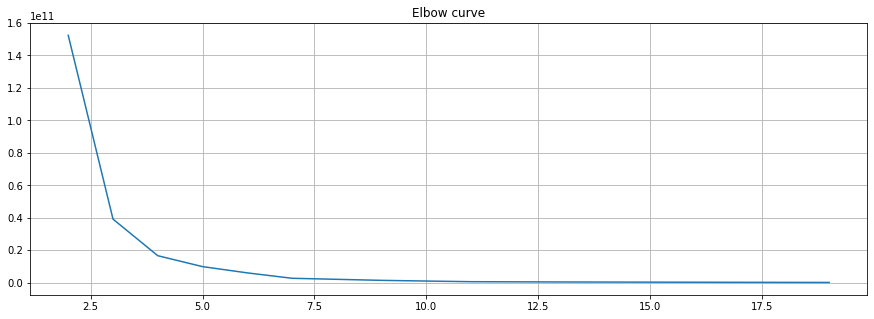

In [11]:
X = training_data.drop(columns=["label","fnlwgt"]).astype("float64")
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)

plt.title('Elbow curve')
plt.show()

In [12]:
dataset = [ctgan,sel_mean_w,VAE]

In [ ]:
prediction = {}
prediction["age"] = make_prediction("age", "reg",training_data, test,dataset)
prediction["workclass"] = make_prediction("workclass", "clf",training_data, test,dataset)
prediction["education"] = make_prediction("education", "clf",training_data, test,dataset)
prediction["education_num"] = make_prediction("education-num", "clf",training_data, test,dataset)
prediction["marital_status"] = make_prediction("marital-status", "clf",training_data, test,dataset)
prediction["occupation"] = make_prediction("occupation", "clf",training_data, test,dataset)
# prediction["relationship"] = make_prediction("relationship", "clf",training_data, test,dataset)
# prediction["race"] = make_prediction("race", "clf",training_data, test,dataset)
# prediction["sex"] = make_prediction("sex", "clf",training_data, test,dataset)
# prediction["capital_gain"] = make_prediction("capital-gain", "reg",training_data, test,dataset)
# prediction["capital_loss"] = make_prediction("capital-loss", "reg",training_data, test,dataset)
# prediction["hours_per_week"] = make_prediction("hours-per-week", "reg",training_data, test,dataset)
# prediction["native_country"] = make_prediction("native-country", "clf",training_data, test,dataset)
# prediction["income"] = make_prediction("income", "clf",training_data, test,dataset)


In [ ]:

# prediction_diff = {}
# prediction_diff["age"] = make_prediction_diff("age", "reg",training_data, test,dataset)
# prediction_diff["workclass"] = make_prediction_diff("workclass", "clf",training_data, test,dataset)
# prediction_diff["education"] = make_prediction_diff("education", "clf",training_data, test,dataset)
# prediction_diff["education_num"] = make_prediction_diff("education-num", "clf",training_data, test,dataset)
# prediction_diff["marital_status"] = make_prediction_diff("marital-status", "clf",training_data, test,dataset)
# prediction_diff["occupation"] = make_prediction_diff("occupation", "clf",training_data, test,dataset)
# prediction_diff["relationship"] = make_prediction_diff("relationship", "clf",training_data, test,dataset)
# prediction_diff["race"] = make_prediction_diff("race", "clf",training_data, test,dataset)
# prediction_diff["sex"] = make_prediction_diff("sex", "clf",training_data, test,dataset)
# prediction_diff["capital_gain"] = make_prediction_diff("capital-gain", "reg",training_data, test,dataset)
# prediction_diff["capital_loss"] = make_prediction_diff("capital-loss", "reg",training_data, test,dataset)
# prediction_diff["hours_per_week"] = make_prediction_diff("hours-per-week", "reg",training_data, test,dataset)
# prediction_diff["native_country"] = make_prediction_diff("native-country", "clf",training_data, test,dataset)
# prediction_diff["income"] = make_prediction_diff("income", "clf",training_data, test,dataset)

### Machine Learning utils

* StrongNum : education-num + capical-gain -> hours-per-week
* WeakNum: education-num -> age
* Strong Cate: marital-status + sex -> relationshiop 
* Weak Cate: education -> occupation

In [ ]:
pd.DataFrame(prediction,index=["ground Truth","ctgan","selgan","VAE"])

In [ ]:
pd.DataFrame(prediction_diff,index=["ground Truth","ctgan","selgan","VAE"])

its:7 col
full:7 col

### Clustering

In [ ]:
from sklearn.cluster import KMeans
pd.DataFrame(make_clustering(training_data,test,dataset),index=["ground Truth","Strong-Num_its","Weak-Num_its","Strong-Cate_its","Weak-Cate_its",
                                "Strong-Num_full","Weak-Num_full","Strong-Cate_full","Weak-Cate_full"],columns=["Clustering NMI"])

## Loss 

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_cate/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_cate_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_cate/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_cate_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_num/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_num_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_num/full/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_num_full training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_cate/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_cate_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_cate/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_cate_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/weak_num/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('weak_num_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [ ]:
data_log = pd.read_csv("dataset/generated/strong_num/its/train_log.txt",
names=["epoch","time","G_origin","G_mean","G_fd","G_KL","G_sel"])
data_log["G_total"] = data_log["G_origin"] + data_log["G_mean"] + data_log["G_fd"] + data_log["G_KL"] + data_log["G_sel"]

fig, axs = plt.subplots(3,2,figsize = (9,6))
fig.suptitle('strong_num_its training log')

axs[0][0].plot(data_log["G_total"])
axs[0][0].set_title("G_total")
axs[0][1].plot(data_log["G_origin"])
axs[0][1].set_title("G_origin")

axs[1][0].plot(data_log["G_mean"])
axs[1][0].set_title("G_mean")
axs[1][1].plot(data_log["G_KL"])
axs[1][1].set_title("G_KL")

axs[2][0].plot(data_log["G_fd"])
axs[2][0].set_title("G_fd")
axs[2][1].plot(data_log["G_sel"])
axs[2][1].set_title("G_sel")

for ax in axs.flat:
    ax.set(xlabel='times', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
plt.show()

### Approximate query processing (AQP)

AQP 
* http://dbgroup.cs.tsinghua.edu.cn/ligl/baq.pdf 
* https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9101822


### Privacy protection

#### Hitting Rate & DCR

In [ ]:
len(dataset)

In [ ]:
similar = hitting_rate(dataset)

In [ ]:
maxi,mini = DCR(dataset)


In [ ]:
pd.DataFrame(np.array([similar,maxi,mini]).T,index=["Origin GAN","Strong-Num_its","Weak-Num_its","Strong-Cate_its","Weak-Cate_its","Strong-Num_full","Weak-Num_full","Strong-Cate_full","Weak-Cate_full"],columns=["Exactly Same data (Categorical)","Distance to the furthest record","Distance to the closest record"])